In [73]:
%load_ext lab_black
%load_ext autoreload
%autoreload 2

import os
import pandas as pd
import numpy as np

os.chdir("../src/")

from dataset_util import Dataset
from matplotlib import pyplot as plt
import sys

sys.path.append("/home/yanhuize/ml-utils")
from my_utils import reduce_mem_usage

ds = Dataset()

The lab_black extension is already loaded. To reload it, use:
  %reload_ext lab_black
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [74]:
ds.train = pd.merge(ds.train, ds.label, on="sequence")

In [75]:
train = reduce_mem_usage(ds.train, verbose=False)

加上那些好用的特征，，

In [76]:
import scipy.stats


def f(x):
    return scipy.stats.kurtosis(x)


train_pivoted0 = train.pivot(
    index=["sequence", "subject"], columns="step", values=ds.sensor_cols
)

train_pivoted0["sensor_04_mean"] = train_pivoted0.sensor04.mean(axis=1)
train_pivoted0["sensor_02_std"] = train_pivoted0.sensor02.std(axis=1)
train_pivoted0["sensor_10_kurtosis"] = scipy.stats.kurtosis(
    train_pivoted0.sensor10, axis=1
)
train_pivoted0["sensor_04_kurtosis"] = scipy.stats.kurtosis(
    train_pivoted0.sensor04, axis=1
)

# train_pivoted0 = train_pivoted0.merge(ds.label, on="sequence")

In [77]:
train_pivoted0.sensor_04_kurtosis.reset_index().merge(ds.label, on="sequence")

,sequence,subject,sensor_04_kurtosis,state
0,0,47,-0.848722,0
1,1,66,3.536804,1
2,2,66,5.871299,1
3,3,542,-0.137156,1
4,4,437,-0.310099,1
...,...,...,...,...
25963,25963,558,0.413364,1
25964,25964,297,-1.000191,0
25965,25965,129,1.342628,1
25966,25966,170,0.719383,1


In [78]:
train_pivoted0.sensor_04_kurtosis.index.get_level_values(0)

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            25958, 25959, 25960, 25961, 25962, 25963, 25964, 25965, 25966,
            25967],
           dtype='int64', name='sequence', length=25968)

In [79]:
def p(col):
    temp = (
        train_pivoted0[col]
        .reset_index()
        .merge(ds.label, on="sequence")
        .sort_values(col)
    ).reset_index()
    plt.scatter(x=temp.index, y=temp.state.rolling(1000).mean(), s=2)
    plt.show()

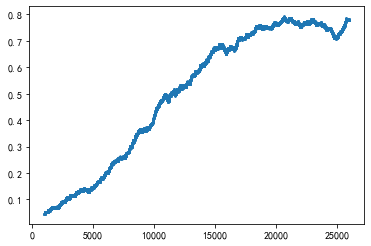

In [80]:
p("sensor_04_kurtosis")

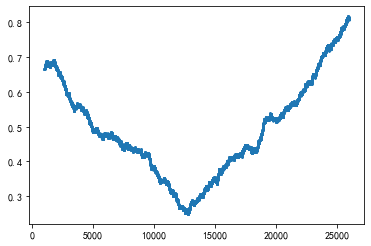

In [81]:
p("sensor_04_mean")